<a href="https://colab.research.google.com/github/jihun5/jupyter_home/blob/main/(26)%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%B4%EC%BD%94%EB%93%9C_%EB%B0%8F_%EC%9A%A9%EC%96%B4%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2023-09-11 01:26:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-09-11 01:26:39--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-09-11 01:26:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

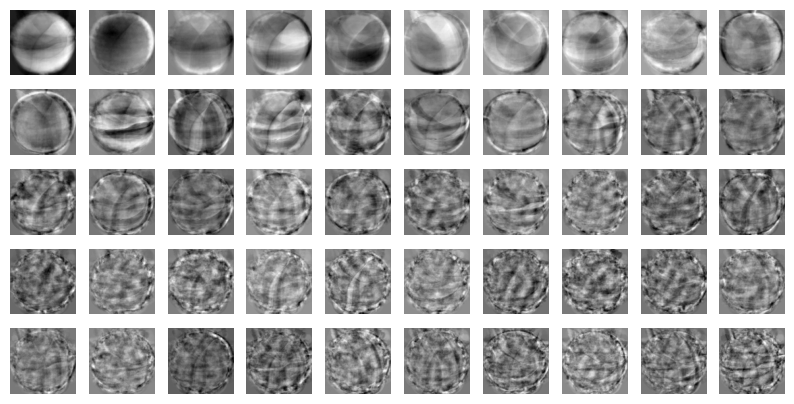

(300, 10000)
(300, 50)


In [4]:
! wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1,100,100))
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)


(300, 10000)


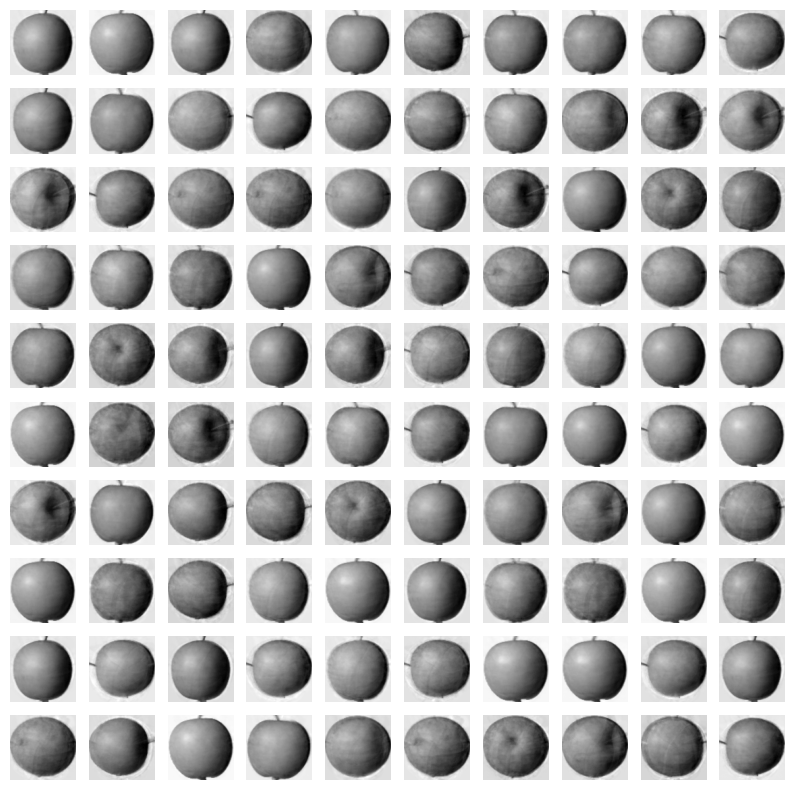

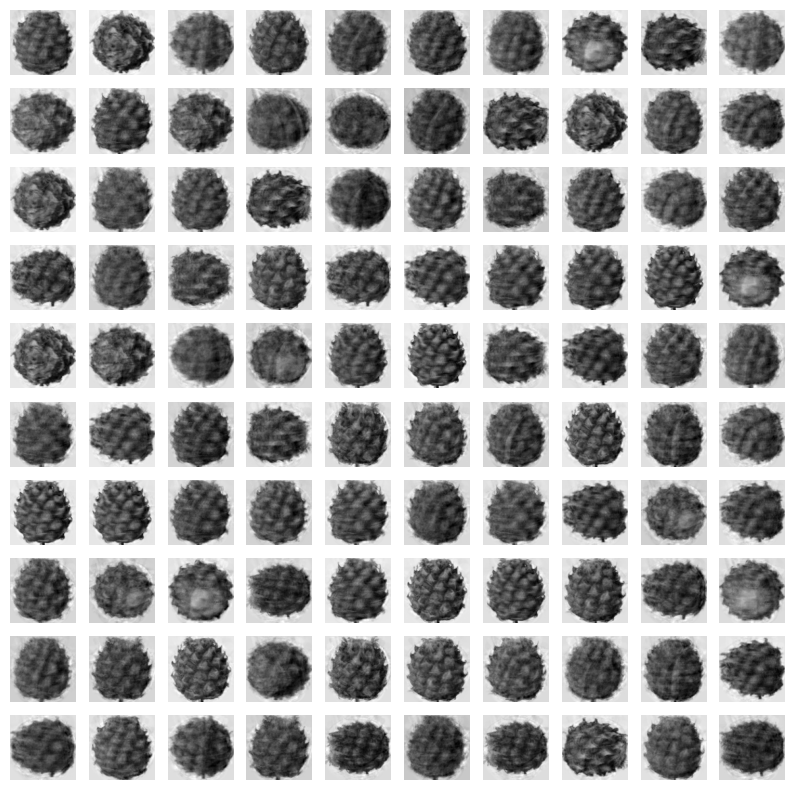

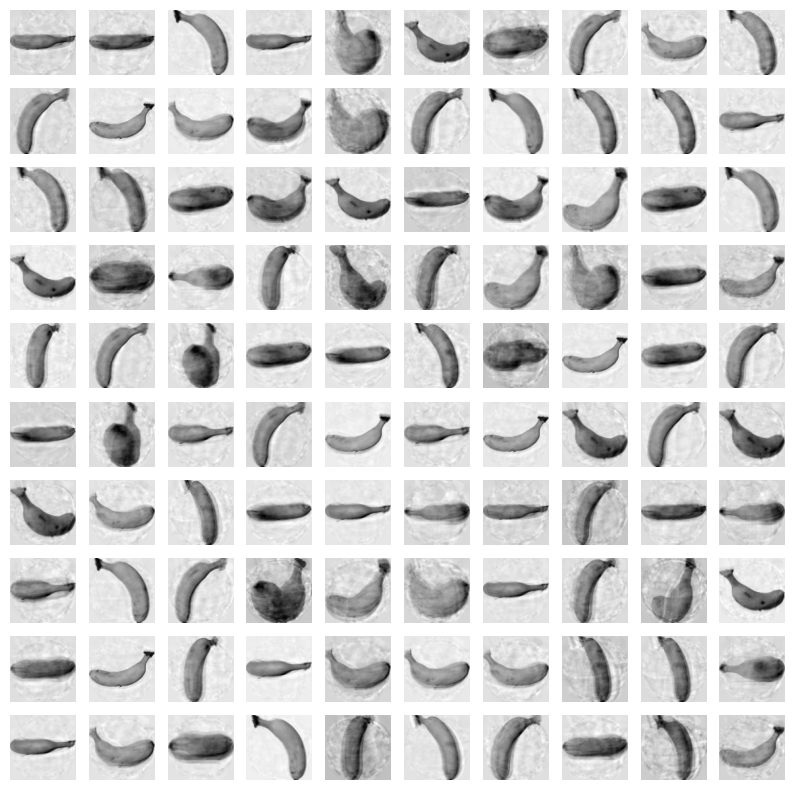

In [5]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')


0.9215026753716162


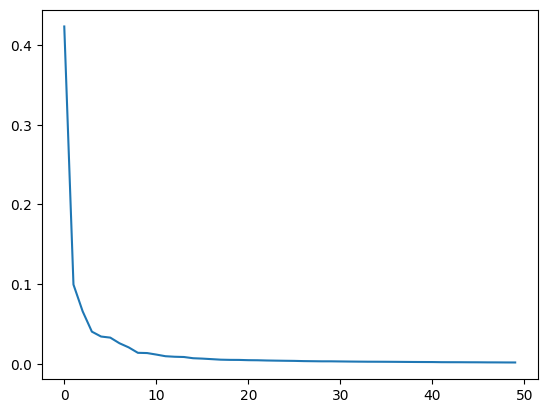

In [6]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

0.9966666666666667
2.199400758743286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.04227256774902344
2
(300, 2)
0.9933333333333334
0.03455853462219238


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


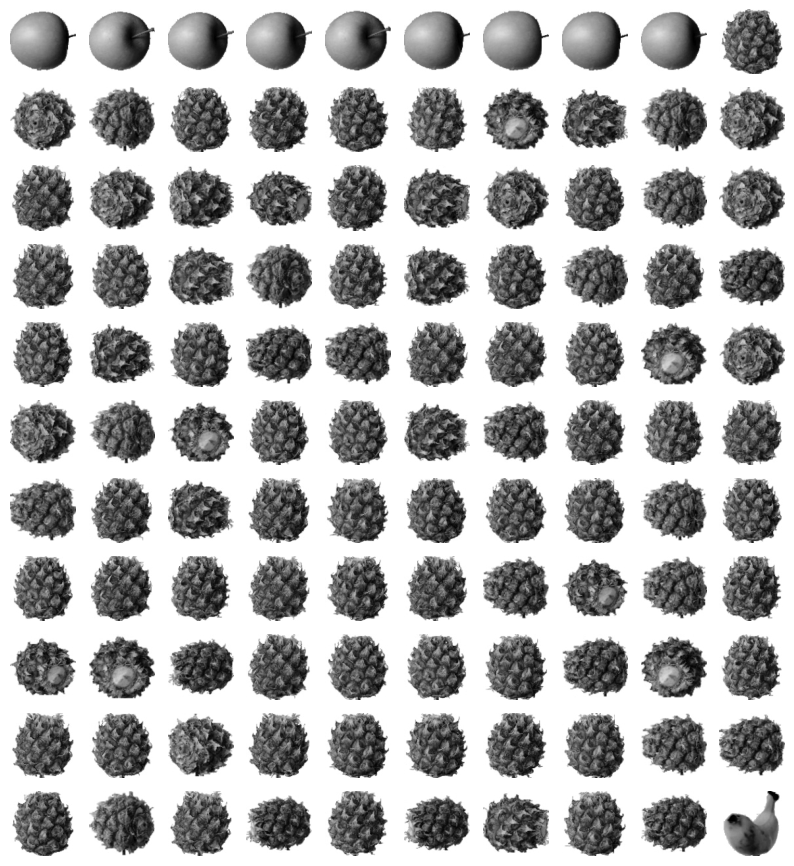

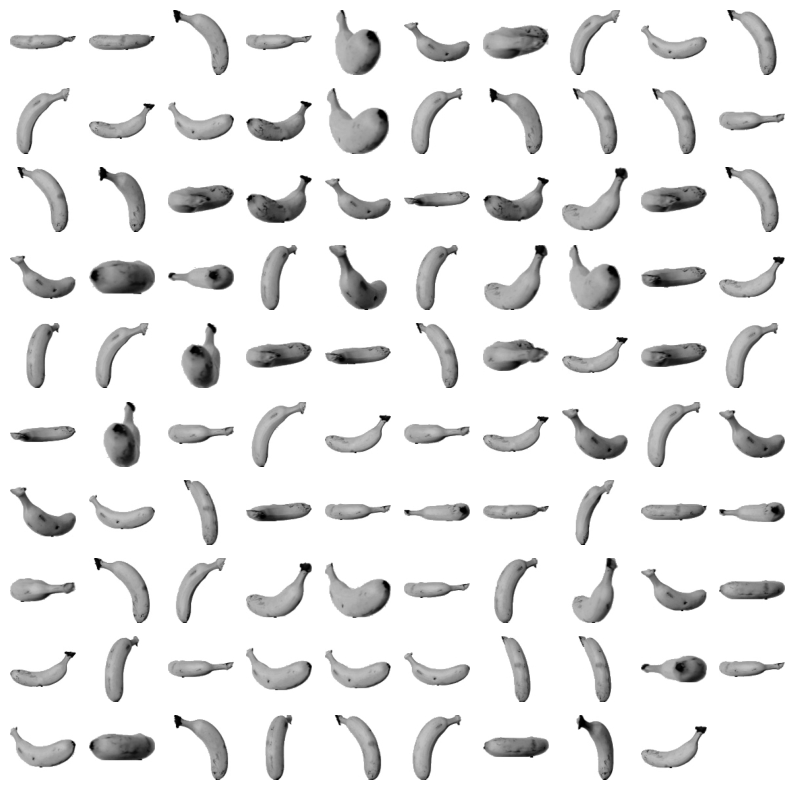

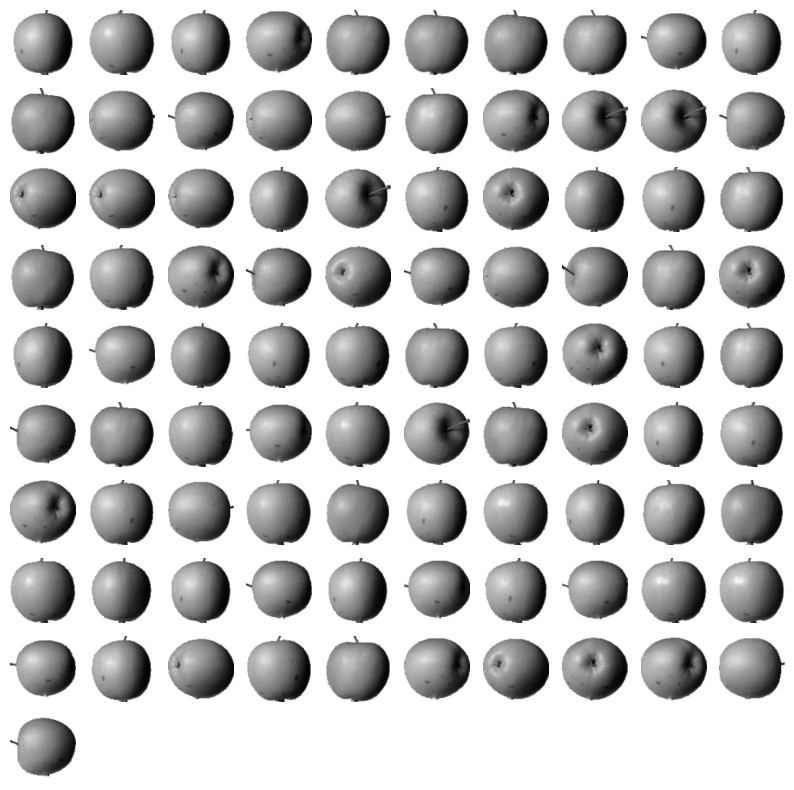

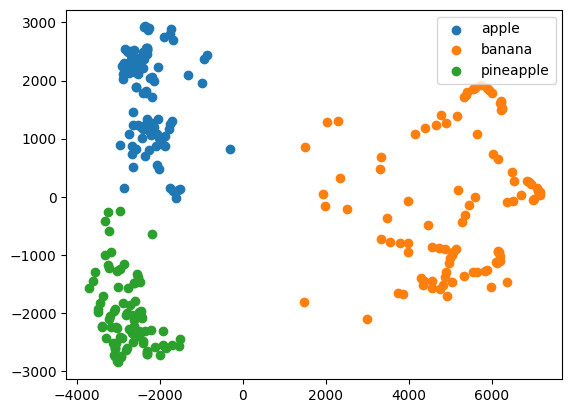

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]* 100 + [1]*100 + [2]*100)

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

차원 축소는 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류다. 차원 축소는 저장 공간을 줄이고 시각화 하기 쉽다.

주성분 분석은 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다. 이런 방향을 주성분이라고 부른다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다.

설명된 분산은 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것. 사이킷런의 PCA클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

PCA는 주성분 분석을 수행하는 클래스다.

n_components는 주성분의 개수를 지정한다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용한다.

components_ 속성에는 훈련 세트에서 찾은 주성분이 저장된다.

explained_variance_ 속성에는 설명된 분산이 저장되고, explained_varicane_ratio_에는 설명된 분산의 비율이 저장된다.

inverse_transform() 매서드는 transform() 매서드로 차원을 축소시킨 데이털르 다시 원본 차원으로 복원한다.
